<a href="https://colab.research.google.com/github/iyengaraditya/Football-Predictions/blob/master/Football_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(A) TEAM SELECTION 

*   *extract_roster(team, year)*: Returns the entire roster of a team (team) for a particular season (year)
*   *playing_eleven(team, year)*: Returns the best starting eleven of a team (team) for a particular season (year)
* *process_starters(team, year)*: Returns the formation that the team (team) should play in for a particular season (year

In [159]:
import pandas as pd
player_data = pd.read_csv('players_complete.csv', sep = ',', encoding='latin1')
player_ratings = player_data.values[0:, 0:12]

In [160]:
def extract_roster(team, year):
  roster = []
  for i in range(0, len(player_ratings)):
    if (player_ratings[i][0]==year and player_ratings[i][5]==team):
      roster.append(player_ratings[i])
  return roster

In [161]:
def playing_eleven(team, year):
  roster_demo = extract_roster(team, year)
  starters_u = []
  for i in range(0, len(roster_demo)):
    if(roster_demo[i][10]!="RES" and roster_demo[i][10]!="SUB"):
      starters_u.append(roster_demo[i])
  return starters_u

In [162]:
def process_starters(team, year):
  starters = playing_eleven(team, year)
  starting_eleven=[]
  def_count = 0
  mid_count = 0
  att_count = 0
  posn = ""
  name = ""
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="GK"):
      starting_eleven.append(name)
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="RB" or posn=="RWB"):
      def_count = def_count + 1
      starting_eleven.append(name)
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="RCB"):
      def_count = def_count + 1
      starting_eleven.append(name)
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="CB"):
      def_count = def_count + 1
      starting_eleven.append(name)
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="LCB"):
      def_count = def_count + 1
      starting_eleven.append(name)
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="LB" or posn=="LWB"):
      def_count = def_count + 1
      starting_eleven.append(name)
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="RM"):
      mid_count = mid_count + 1
      starting_eleven.append(name)
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="RCM" or posn=="RDM" or posn=="CM" or posn == "CDM"):
      mid_count = mid_count + 1
      starting_eleven.append(name)
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="LDM" or posn=="LCM"):
      mid_count = mid_count + 1
      starting_eleven.append(name)
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="LM"):
      mid_count = mid_count + 1
      starting_eleven.append(name)
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="CAM"):
      mid_count = mid_count + 1
      starting_eleven.append(name)
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="RW" or posn =="RF" or posn=="RS"):
      att_count = att_count + 1
      starting_eleven.append(name)
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="CF" or posn=="ST"):
      att_count = att_count + 1
      starting_eleven.append(name)
  for i in range(0, len(starters)):
    posn = starters[i][10]
    name = starters[i][2]
    if(posn=="LW" or posn=="LF" or posn=="LS"):
      att_count = att_count + 1
      starting_eleven.append(name)
  if(def_count+mid_count+att_count == 10):
     starting_eleven.append("FORMATION:")
     starting_eleven.append(def_count)
     starting_eleven.append(mid_count)
     starting_eleven.append(att_count)
  return starting_eleven

In [163]:
# SAMPLE CODE
team = process_starters("Chelsea", 2020)
for i in range(0, len(team)):
  print(team[i])

Kepa Arrizabalaga
Cesar Azpilicueta Tanco
Andreas Christensen
Kurt Zouma
Emerson Palmieri
N'Golo Kante
Jorginho
Mason Mount
Pedro Rodriguez
Tammy Abraham
Christian Pulisic
FORMATION:
4
3
3


(B) HEAD TO HEAD RECORD


*   *h2h_record(team1, team2)*: Returns the descriptive head to head record for the teams (team1 and team2) since 2007
*   *h2h_number(team1, team2)*: Returns the head to head record for the teams (team1 and team2) since 2007 as an array (HW, HD, HL, AW, AD, AL)



In [164]:
import pandas as pd
head_to_head = pd.read_csv('H2H PL.csv', sep = ',', encoding='latin1')
record = head_to_head.values[0:, 0:6]

In [165]:
def h2h_record(team1, team2):
  h2h = []
  for i in range(0, len(record)):
    if((record[i][0]==team1 and record[i][1]==team2) or (record[i][0]==team2 and record[i][1]==team1)):
      h2h.append(record[i])
  return h2h

In [166]:
def h2h_number(team1, team2):
  rec = h2h_record(team1, team2)
  count = [0, 0, 0, 0, 0, 0]
  for i in range(0, len(rec)):
    if(rec[i][0]==team1):
      if(rec[i][4]=='H'):
        count[0] = count[0] + 1
      if(rec[i][4]=='D'):
        count[1] = count[1] + 1
      if(rec[i][4]=='A'):
        count[2] = count[2] + 1
    if(rec[i][0]==team2):
      if(rec[i][4]=='H'):
        count[3] = count[3] + 1
      if(rec[i][4]=='D'):
        count[4] = count[4] + 1
      if(rec[i][4]=='A'):
        count[5] = count[5] + 1
  return count

In [167]:
# SAMPLE CODE
rec = h2h_record("Manchester United", "Queens Park Rangers")
num = h2h_number("Manchester United", "Queens Park Rangers")
for i in range(0, len(rec)):
  print(rec[i])
print(num)

['Queens Park Rangers' 'Manchester United' 0 2 'A' 2012]
['Manchester United' 'Queens Park Rangers' 2 0 'H' 2012]
['Manchester United' 'Queens Park Rangers' 3 1 'H' 2013]
['Queens Park Rangers' 'Manchester United' 0 2 'A' 2013]
['Manchester United' 'Queens Park Rangers' 4 0 'H' 2015]
['Queens Park Rangers' 'Manchester United' 0 2 'A' 2015]
[3, 0, 0, 0, 0, 3]


(C) Crude Score Prediction


*   *average_team_rating(team, year)*: Returns the average FIFA rating for the starting eleven of the team (team) for the season (year)
*   *score_predictor_simple(home_team, away_team)*: Returns the expected score for a game between two teams (home_team, away_team) as an array (HS, AS)
*   *simulate_season()*: For a separately imported schedule, predicts the scores of all the games in the schedule and returns a matrix of teams and scores
*   *points_per_season(team, stats)*: Predicts the total points that a team (team) scores in a season that was simulated (stats)
*   *team_stats(team)*: Displays how a team performed over an entire season, returns a matrix of the team, all its opponents and the corresponding results







In [168]:
def average_team_rating(team, year):
  squad = playing_eleven(team, year)
  avg_rating = 0
  for i in range(len(squad)):
    avg_rating = avg_rating + squad[i][8]
  return round(avg_rating/11)

In [169]:
import numpy as np
import random
def score_predictor_simple(home_team, away_team):
  rec = h2h_record(home_team, away_team)
  num = h2h_number(home_team, away_team)
  year = 2020
  xg_home1 = 0
  xg_away1 = 0
  xg_home2 = 0
  xg_away2 = 0
  x = [0, 0]
  for i in range(len(rec)):
    if(rec[i][0]==home_team):
      xg_home1 = xg_home1 + rec[i][2]
      xg_away1 = xg_away1 + rec[i][3]
  xg_home1 = abs(int(round(2*xg_home1/(sum(num)+0.0001))))
  xg_away1 = abs(int(round(2*xg_away1/(sum(num)+0.0001))))
  x1 = [xg_home1, xg_away1]
  r_home = average_team_rating(home_team, year)
  r_away = average_team_rating(away_team, year)
  xg_home2 = abs(int(np.floor(random.gauss((r_home - 60)/(2*(r_away - 60)), 2 - (r_away/r_home)))))
  xg_away2 = abs(int(np.floor(random.gauss((r_away - 60)/(2*(r_home - 60)), 2 - (r_home/r_away)))))
  x2 = [xg_home2, xg_away2]
  x[0] = abs(int(np.floor(((len(rec)*xg_home1) + 2*(xg_home2))/(len(rec) + 2))))
  x[1] = abs(int(np.floor(((len(rec)*xg_away1) + 2*(xg_away2))/(len(rec) + 2))))
  if(r_home>83 and r_away<=81):
    x[0] = x[0] + abs(int(np.floor((random.uniform(0, 3.1)))))
  if(r_home<=81 and r_away>83):
    x[1] = x[1] + abs(int(np.floor(random.uniform(0, 2.1))))
  if(x[0]==x[1]):
    if(random.uniform(0, 2)>0.5):
      x[0] = x[1] = 0
    if(random.uniform(0, 2)<1.5):
      x[0] = x[1] = 1
    if(random.uniform(0, 4)<1):
      x[0] = x[1] = 2
    if(random.uniform(0, 10)<1):
      x[0] = x[1] = 3
    if(random.uniform(0, 4)<1.5):
      if(r_home>=r_away):
        x[0] = int(random.uniform(1, 4))
        x[1] = int(random.uniform(0, 3))
      else:
        x[1] = int(random.uniform(1, 4))
        x[0] = int(random.uniform(0, 3))
  return x

In [ ]:
# SAMPLE CODE
print(average_team_rating("Arsenal", 2020))

In [ ]:
# SAMPLE CODE
home_team = "Liverpool"
away_team = "Chelsea"
#x = score_predictor_simple(home_team, away_team)
x_home = 0
x_away = 0
epoch = 1000
for i in range(0, epoch):
  x = score_predictor_simple(home_team, away_team)
  x_home = x_home + x[0]
  x_away = x_away + x[1]
print(home_team + " " + str(int(round(x_home/epoch)))+ " " + away_team + " " + str(int(round(x_away/epoch))))
#print(home_team + " " + str(x[0]) + " " + away_team + " " + str(x[1]))

In [172]:
import pandas as pd
schedule = pd.read_csv('PL2020.csv', sep = ',', encoding='latin1')
schedule = schedule.values[0:, 0:7]
list_of_teams = pd.read_csv('list_of_teams_20.csv', sep = ',', encoding='latin1')
list_of_teams = list_of_teams.values[0:]

In [173]:
def simulate_season():
  season_stats = []
  game_result = [0, 0, 0, 0]
  for i in range(0, 380):
    home_team = schedule[i][1]
    away_team = schedule[i][5]
    score = score_predictor_simple(home_team, away_team)
    game_result = [home_team, away_team, score[0], score[1]]
    season_stats.append(game_result)
  return season_stats

In [174]:
def points_per_season(team, stats):
  points = 0
  for i in range(len(stats)):
    if(stats[i][0]==team):
      if(stats[i][2]>stats[i][3]):
        points = points + 3
      if(stats[i][2]==stats[i][3]):
        points = points + 1
    if(stats[i][1]==team):
        if(stats[i][2]<stats[i][3]):
          points = points + 3
        if(stats[i][2]==stats[i][3]):
          points = points + 1
  return points

In [ ]:
# SAMPLE CODE
table = []
stats = simulate_season()
for i in range(0, 20):
  team = [0, 0]
  team[0] = list_of_teams[i][0]
  team[1] = points_per_season(team[0], stats)
  table.append(team)
def takeSecond(elem):
    return elem[1]
table.sort(reverse= True, key=takeSecond)
for i in range(0, 20):
  print(str(i+1) + ". " + table[i][0] + " " + str(table[i][1]))

In [176]:
def team_stats(team):
  stats = simulate_season()
  team_record = []
  for i in range(0, len(stats)):
    if(stats[i][0]==team or stats[i][1]==team):
      team_record.append(stats[i])
  return team_record

In [ ]:
# SAMPLE CODE
result = team_stats("Sheffield United")
for i in range(0, len(result)):
  print(result[i])

(D) Game Simulator

*   *scoreprob(team, year)*: Assigns a goal-scoring probability vector to the starting eleven of a team (team) for a particular season (year)
*   *getscorer(team, year, score)*: Given a particular score (score) in a game played by a team (team) in the season (year), returns a matrix of how those goals were distributed in the 90 minutes and which players scored the goals
*   *simulator_display(home_team, away_team, score)*: Provides a visual interface for the simulation of a game played between two teams (home_team, away_team) with score (score). The two starting elevens are displayed following which the simulation begins. Expected time for completion: 30 seconds. Compatible for teams playing in the Premier League in 2020 only. See schedule.csv for further info.

In [177]:
def scoreprob(team, year):
  ordered_team = process_starters(team, year)
  def_count = ordered_team[12]
  mid_count = ordered_team[13]
  att_count = ordered_team[14]
  score_prob = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  sum = 0
  for i in range(1, def_count+1):
    score_prob[i] = 1
    sum = sum + 1
  for i in range(def_count+1, def_count+mid_count+1):
    score_prob[i] = 3
    sum = sum + 3
  for i in range(def_count + mid_count + 1, 11):
    score_prob[i] = 5
    sum = sum + 5
  for i in range(0, 11):
    score_prob[i] = score_prob[i]/sum
  score_cum = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  for i in range(0, 11):
    for j in range(0, i+1):
      score_cum[i] = score_cum[i] + score_prob[j]
  return score_cum

In [178]:
def get_scorer(team, year, score):
  squad = process_starters(team, year)
  score_prob = scoreprob(team, year)
  goal_vector = [0, 0, 0, 0] #goal no, scorer, time
  goal_matrix = []
  if(score == 0):
    return goal_vector
  for i in range(0, score):
    goal_vector = [0, 0, 0, 0]
    goal_vector[3] = team
    goal_vector[0] = i+1
    goal_vector[1] = squad[1]
    num = random.uniform(score_prob[1], 1)
    for j in range(0, 10):
      if(num > score_prob[j] and num <= score_prob[j+1]):
        goal_vector[1] = squad[j+1]
    time = int(random.uniform(1, 90.1))
    goal_vector[2] = time
    goal_matrix.append(goal_vector)
  def takeThird(elem):
    return elem[2]
  goal_matrix.sort(reverse= False, key=takeThird)
  for i in range(len(goal_matrix)):
    goal_matrix[i][0] = i+1
  return goal_matrix

In [179]:
import time
import numpy as np
def simulator_display(home_team, away_team, year):
  ordered_home_team = process_starters(home_team, year)
  ordered_away_team = process_starters(away_team, year)
  score_prob_home = scoreprob(home_team, year)
  score_prob_away = scoreprob(away_team, year)
  score = score_predictor_simple(home_team, away_team)
  goal_data_home = get_scorer(home_team, year, score[0])
  goal_data_away = get_scorer(away_team, year, score[1])
  goal_data = []
  print("Welcome to the Live Coverage of the game between " + home_team + " vs. " + away_team)
  print("The " + home_team + " lineup is as follows:")
  for i in range(0, 11):
    print(ordered_home_team[i])
  print("\nThe " + away_team + " lineup is as follows:")
  for i in range(0, 11):
    print(ordered_away_team[i])
  time.sleep(4)
  print("\n KICK-OFF")
  if(goal_data_home== [0, 0, 0, 0] and goal_data_away== [0, 0, 0, 0]):
    time.sleep(90/4)
    print("\n FINAL SCORE:" + home_team + " 0 " + away_team + " 0")
  else:
    if(score[0]!=0):
      for i in range(0, len(goal_data_home)):
        goal_data.append(goal_data_home[i])
    if(score[1]!=0):
      for i in range(0, len(goal_data_away)):
        goal_data.append(goal_data_away[i])
    def takeThird(elem):
      return elem[2]
    #print(goal_data)
    goal_data.sort(reverse= False, key=takeThird)
    home_goals = 0
    away_goals = 0
    for i in range(0, len(goal_data)):
      if(i != 0):
        time.sleep((goal_data[i][2] - goal_data[i-1][2])/4)
      else:
        time.sleep(goal_data[i][2]/4)
      if(goal_data[i][3] == home_team):
        home_goals = home_goals + 1
      if(goal_data[i][3] == away_team):
        away_goals = away_goals + 1
      print(str(goal_data[i][2]) + "\" " + home_team + " " + str(home_goals) + " " + away_team + " " + str(away_goals) + " (" + goal_data[i][1] + ")\n")
      if(i == len(goal_data)-1):
        time.sleep((90 - goal_data[i][2])/4)
    print("\n FINAL SCORE: " + home_team + " " + str(home_goals) + " " + away_team + " " + str(away_goals))  
  

In [ ]:
# SAMPLE CODE
simulator_display("Tottenham Hotspur", "Sheffield United", 2020)

In [ ]:
# SAMPLE CODE
team = "Manchester City"
year = 2015
roster = extract_roster(team, year)
for i in range(0, len(roster)):
  print(roster[i][1])

In [ ]:
# SAMPLE CODE
print(h2h_record("Chelsea", "Portsmouth"))

In [180]:
h2hdata = pd.DataFrame(record)
h2hdata['home_rating'] = np.random.randn(len(h2hdata))
h2hdata['away_rating'] = np.random.randn(len(h2hdata))
h2hdata = h2hdata.rename(columns = {0:"home_team", 1:"away_team", 2:"home_score", 3:"away_score", 4:"result", 5:"year"})

(E) Neural Network for Result Prediction

* The first block is used to extrapolate ratings. We have ratings from 2014 to 2019 while head-to-head results are from 2007 to 2019. To cover up for this, teams are either assigned their maximum available rating or a default rating of 72 if the former is unavailable. For some reason, if this produces a nonsensical result in the first go, comment out the if statements, run the block, then uncomment them and run it again. This should produce a sensible result.
* The fifth block prepares the input layer for learning - it normalizes the ratings and year and assigns a unique number to each team - in order to make the data interpretable to the neural network.
* The sixth block splits the dataset into training and test data
* The seventh and eighth blocks encode the results (H, A, D) into numerical codes, again for interpretability
* Block 9 contains the neural network architecture
* *predictor(home, away)*: Returns the predictions for a game between *home* and *away* teams
* *display_preds(home, away)*: Displays home win, away win and draw probabilities in user-friendly format
* Finally, the model is tested on the fixtures of the 2019-20 season and a CSV output is produced

In [ ]:
# BLOCK E1
for i in range(0, len(h2hdata)):
  h2hdata['home_rating'][i] = average_team_rating(h2hdata['home_team'][i], h2hdata['year'][i])
  h2hdata['away_rating'][i] = average_team_rating(h2hdata['away_team'][i], h2hdata['year'][i])

In [ ]:
# BLOCK E2
for i in range(0, len(h2hdata)):
  if(h2hdata['home_rating'][i] == 0):
    h2hdata['home_rating'][i] = max(h2hdata['home_rating'][h2hdata['home_team'] == h2hdata['home_team'][i]])
  if(h2hdata['away_rating'][i] == 0):
    h2hdata['away_rating'][i] = max(h2hdata['away_rating'][h2hdata['away_team'] == h2hdata['away_team'][i]])
  if(h2hdata['home_rating'][i] == 0):
    h2hdata['home_rating'][i] = 72
  if(h2hdata['away_rating'][i] == 0):
    h2hdata['away_rating'][i] = 72

In [183]:
# BLOCK E3
# SAMPLE CODE
h2hdata

,home_team,away_team,home_score,away_score,result,year,home_rating,away_rating
0,Sheffield United,Liverpool,1,1,D,2007,72.0,84.0
1,Arsenal,Aston Villa,1,1,D,2007,85.0,76.0
2,Everton,Watford,2,1,H,2007,81.0,78.0
3,Newcastle United,Wigan Athletic,2,1,H,2007,78.0,72.0
4,Portsmouth,Blackburn Rovers,3,0,H,2007,72.0,72.0
...,...,...,...,...,...,...,...,...
4934,Leicester City,Chelsea,0,0,D,2019,80.0,85.0
4935,Liverpool,Wolverhampton Wanderers,2,0,H,2019,84.0,78.0
4936,Manchester United,Cardiff City,0,2,A,2019,85.0,74.0
4937,Southampton,Huddersfield Town,1,1,D,2019,78.0,77.0


In [184]:
# BLOCK E4
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dropout

Using TensorFlow backend.


In [ ]:
# BLOCK E5
input_layer = {'home_team':h2hdata['home_team'], 'away_team':h2hdata['away_team'], 
                   'home_rating':h2hdata['home_rating'], 'away_rating':h2hdata['away_rating'],
                   'year':h2hdata['year'], 'result': h2hdata['result'], 'home_score':h2hdata['home_score'],
               'away_score':h2hdata['away_score']}
input_layer = pd.DataFrame(input_layer)
for i in range(0, len(input_layer)):
  input_layer['home_rating'][i] = (input_layer['home_rating'][i] - 70.0)/(87.0 - 70.0)
  input_layer['away_rating'][i] = (input_layer['away_rating'][i] - 70.0)/(87.0 - 70.0)
  input_layer['year'][i] = (input_layer['year'][i] - 2006)/(2020-2006)
input_layer['home_team'] = pd.Categorical(input_layer['home_team'])
input_layer['home_team'] = input_layer.home_team.cat.codes
input_layer['away_team'] = pd.Categorical(input_layer['away_team'])
input_layer['away_team'] = input_layer.away_team.cat.codes
input_layer['result'] = pd.Categorical(input_layer['result'])
input_layer['result'] = input_layer.result.cat.codes
input_layer

In [186]:
# BLOCK E6
from sklearn.model_selection import train_test_split
train, test = train_test_split(input_layer, test_size = 0.05)
train1 = train.drop(['home_score', 'away_score'], axis = 1)
test1 = test.drop(['home_score', 'away_score'], axis = 1)
train1_y = train1['result']
train1_x = train1.drop(['result'], axis = 1)
test1_y = test1['result']
test1_x = test1.drop(['result'], axis = 1)

In [ ]:
# BLOCK E7
train1_y = pd.DataFrame(train1_y)
encoder = LabelEncoder()
encoder.fit(train1_y)
train1_y = encoder.transform(train1_y)
train1_y = np_utils.to_categorical(train1_y)

In [ ]:
# BLOCK E8
test1_y = pd.DataFrame(test1_y)
encoder = LabelEncoder()
encoder.fit(test1_y)
test1_y = encoder.transform(test1_y)
test1_y = np_utils.to_categorical(test1_y)

In [190]:
# BLOCK E9
model = Sequential()
model.add(Dense(1024, input_dim = len(train1_x.columns), activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adagrad', metrics = ['accuracy'])
history = model.fit(train1_x, train1_y, epochs = 30)
history

Epoch 1/30
4692/4692 [==============================] - 3s 550us/step - loss: 0.7228 - accuracy: 0.6656
Epoch 2/30
4692/4692 [==============================] - 1s 183us/step - loss: 0.6172 - accuracy: 0.6701
Epoch 3/30
4692/4692 [==============================] - 1s 183us/step - loss: 0.6148 - accuracy: 0.6709
Epoch 4/30
4692/4692 [==============================] - 1s 183us/step - loss: 0.6119 - accuracy: 0.6768
Epoch 5/30
4692/4692 [==============================] - 1s 185us/step - loss: 0.6072 - accuracy: 0.6827
Epoch 6/30
4692/4692 [==============================] - 1s 184us/step - loss: 0.5977 - accuracy: 0.6900
Epoch 7/30
4692/4692 [==============================] - 1s 181us/step - loss: 0.5888 - accuracy: 0.6972
Epoch 8/30
4692/4692 [==============================] - 1s 182us/step - loss: 0.5852 - accuracy: 0.7008
Epoch 9/30
4692/4692 [==============================] - 1s 181us/step - loss: 0.5823 - accuracy: 0.7048
Epoch 10/30
4692/4692 [==============================] - 1s 185u

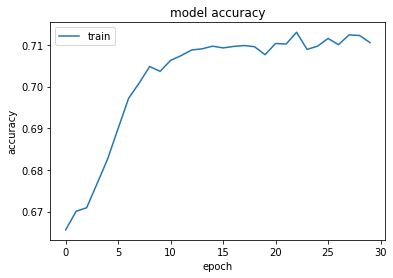

In [191]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [192]:
# BLOCK E10
model.evaluate(test1_x, test1_y)
pred_data = pd.DataFrame(model.predict(test1_x)*100)
pred_data = pred_data.rename(columns = {0:"AWAY WIN", 1: "DRAW", 2: "HOME WIN"})
pred_data

247/247 [==============================] - 0s 253us/step


,AWAY WIN,DRAW,HOME WIN
0,42.788383,37.989777,19.221836
1,11.269382,20.405014,68.325607
2,22.875134,26.849354,50.275517
3,34.479256,28.926266,36.594479
4,28.158232,29.613642,42.228127
...,...,...,...
242,12.710995,20.726093,66.562912
243,11.677021,20.029404,68.293579
244,29.882395,31.691900,38.425697
245,16.808992,24.079588,59.111423


In [193]:
# BLOCK E11
# SAMPLE CODE
test1_x

,home_team,away_team,home_rating,away_rating,year
690,2,20,0.117647,1.000000,0.142857
564,14,5,0.647059,0.117647,0.142857
163,34,27,0.470588,0.117647,0.0714286
763,17,15,0.294118,0.470588,0.214286
3833,8,17,0.235294,0.294118,0.785714
...,...,...,...,...,...
2656,33,31,0.882353,0.470588,0.5
4678,19,15,0.823529,0.470588,0.928571
659,3,15,0.117647,0.470588,0.142857
531,14,15,0.647059,0.470588,0.142857


In [194]:
# BLOCK E12
test_output = test1_x
testindex = test_output.index.values
for i in range(0, len(testindex)):
  test_output['home_team'][testindex[i]] = h2hdata['home_team'][testindex[i]]
  test_output['away_team'][testindex[i]] = h2hdata['away_team'][testindex[i]]
test_output['home_win'] = pred_data['HOME WIN'].to_numpy()
test_output['draw'] = pred_data['DRAW'].to_numpy()
test_output['away_win'] = pred_data['AWAY WIN'].to_numpy()
test_output

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,home_team,away_team,home_rating,away_rating,year,home_win,draw,away_win
690,Birmingham City,Manchester City,0.117647,1.000000,0.142857,19.221836,37.989777,42.788383
564,Everton,Bolton Wanderers,0.647059,0.117647,0.142857,68.325607,20.405014,11.269382
163,Watford,Reading,0.470588,0.117647,0.0714286,50.275517,26.849354,22.875134
763,Hull City,Fulham,0.294118,0.470588,0.214286,36.594479,28.926266,34.479256
3833,Burnley,Hull City,0.235294,0.294118,0.785714,42.228127,29.613642,28.158232
...,...,...,...,...,...,...,...,...
2656,Tottenham Hotspur,Sunderland,0.882353,0.470588,0.5,66.562912,20.726093,12.710995
4678,Liverpool,Fulham,0.823529,0.470588,0.928571,68.293579,20.029404,11.677021
659,Blackburn Rovers,Fulham,0.117647,0.470588,0.142857,38.425697,31.691900,29.882395
531,Everton,Fulham,0.647059,0.470588,0.142857,59.111423,24.079588,16.808992


In [ ]:
# BLOCK E13
test_output['result'] = "DRAW"
for i in test_output.index:
  if(test_output['home_win'][i]>=test_output['away_win'][i] and test_output['home_win'][i]>=test_output['draw'][i]):
    test_output['result'][i] = "HOME"
  if(test_output['away_win'][i]>=test_output['home_win'][i] and test_output['away_win'][i]>=test_output['draw'][i]):
    test_output['result'][i] = "AWAY"
test_output

In [ ]:
test['result'] = "DRAW"
for i in test.index:
  if(test['home_score'][i] > test['away_score'][i]):
    test['result'][i] = "HOME"
  if(test['away_score'][i] > test['home_score'][i]):
    test['result'][i] = "AWAY"
test

In [218]:
sum = 0
for i in test.index:
  if(test['result'][i] == test_output['result'][i]):
    sum = sum + 1
test_acc = sum
test_acc

0.5384615384615384

In [195]:
# BLOCK E14
def predictor(home, away):
  teamlist = []
  for i in range(0, len(h2hdata)):
    teamlist.append(h2hdata['home_team'][i])
  teamlist = pd.unique(teamlist)
  teamlist = np.sort(teamlist)
  teamindex = np.zeros(len(teamlist))
  homecount = 0
  awaycount = 0
  for i in range(0, len(teamindex)):
    if(teamlist[i] == home):
      homecount = 1
    if(teamlist[i] == away):
      awaycount = 1
    teamindex[i] = i
  if(homecount == 1):
    homeindex = np.where(teamlist == home)[0][0]
  if(awaycount == 1):
    awayindex = np.where(teamlist == away)[0][0]
  if(homecount == 0):
    homeindex = np.random.randint(0, len(teamlist))
  if(awaycount == 0):
    awayindex = np.random.randint(0, len(teamlist))
  homerating = average_team_rating(home, 2020)
  awayrating = average_team_rating(away, 2020)
  if(homerating == 0):
    homerating = max(average_team_rating(home, 2015), average_team_rating(home, 2016), average_team_rating(home, 2017),
                     average_team_rating(home, 2018), average_team_rating(home, 2019), 72)
  if(awayrating == 0):
    awayrating = max(average_team_rating(away, 2015), average_team_rating(away, 2016), average_team_rating(away, 2017),
                     average_team_rating(away, 2018), average_team_rating(away, 2019), 72)
  input = np.array([homeindex, awayindex, (homerating - 70)/(87-70), (awayrating - 70)/(87-70), 0.5])
  input = pd.DataFrame(input)
  input = input.transpose()
  preds = model.predict(input)
  return preds

In [51]:
# BLOCK E15
def display_preds(home, away):
  preds = predictor(home, away)
  print("Win probability for: " + str(home) + " is " + str(round(preds[0][2]*100, 0)) + "%")
  print("Win probability for: " + str(away) + " is " + str(round(preds[0][0]*100, 0)) + "%")
  print("Probability of a draw is " + str(round(preds[0][1]*100, 0)) + "%")

In [57]:
# BLOCK E16
# SAMPLE CODE
# Probabilities if the teams were to play in the Premier League in 2020
display_preds("Sheffield United", "Liverpool")

Win probability for: Sheffield United is 19.0%
Win probability for: Liverpool is 61.0%
Probability of a draw is 20.0%


In [221]:
# BLOCK E17
schedule = pd.DataFrame(schedule)
if(len(schedule) != 380):
  schedule = schedule.drop([380, 381], axis = 0)
schedule

,0,1,2,3,4,5,6
0,LIV,Liverpool,09-08-2019,20:00:00,NOR,Norwich City,"Anfield, Liverpool"
1,BOU,Bournemouth,10-08-2019,15:00:00,SUN,Sheffield United,"Vitality Stadium, Bournemouth"
2,BUR,Burnley,10-08-2019,15:00:00,SOU,Southampton,"Turf Moor, Burnley"
3,CRY,Crystal Palace,10-08-2019,15:00:00,EVE,Everton,"Selhurst Park, London"
4,LEI,Leicester City,10-08-2019,15:00:00,WOL,Wolverhampton Wanderers,"King Power Stadium, Leicester"
...,...,...,...,...,...,...,...
375,LEI,Leicester City,17-05-2020,15:00:00,MUN,Manchester United,"King Power Stadium, Leicester"
376,MCI,Manchester City,17-05-2020,15:00:00,NOR,Norwich City,"Etihad Stadium, Manchester"
377,NEW,Newcastle United,17-05-2020,15:00:00,LIV,Liverpool,"St. James' Park, Newcastle"
378,SOU,Southampton,17-05-2020,15:00:00,SUN,Sheffield United,"St. Mary's Stadium, Southampton"


In [59]:
# BLOCK E18
schedule['home_win'] = np.zeros(380)
schedule['away_win'] = np.zeros(380)
schedule['draw'] = np.zeros(380)
for i in range(0, 380):
  pred = predictor(schedule[1][i], schedule[5][i])
  schedule['home_win'][i] = round(pred[0][2]*100, 2)
  schedule['away_win'][i] = round(pred[0][0]*100, 2)
  schedule['draw'][i] = round(pred[0][1]*100, 2)
schedule

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,0,1,2,3,4,5,6,home_win,away_win,draw
0,LIV,Liverpool,09-08-2019,20:00:00,NOR,Norwich City,"Anfield, Liverpool",80.48,5.22,14.30
1,BOU,Bournemouth,10-08-2019,15:00:00,SUN,Sheffield United,"Vitality Stadium, Bournemouth",59.84,15.60,24.56
2,BUR,Burnley,10-08-2019,15:00:00,SOU,Southampton,"Turf Moor, Burnley",47.08,24.69,28.23
3,CRY,Crystal Palace,10-08-2019,15:00:00,EVE,Everton,"Selhurst Park, London",33.58,37.48,28.94
4,LEI,Leicester City,10-08-2019,15:00:00,WOL,Wolverhampton Wanderers,"King Power Stadium, Leicester",47.60,25.55,26.85
...,...,...,...,...,...,...,...,...,...,...
375,LEI,Leicester City,17-05-2020,15:00:00,MUN,Manchester United,"King Power Stadium, Leicester",38.15,34.76,27.09
376,MCI,Manchester City,17-05-2020,15:00:00,NOR,Norwich City,"Etihad Stadium, Manchester",79.94,5.48,14.59
377,NEW,Newcastle United,17-05-2020,15:00:00,LIV,Liverpool,"St. James' Park, Newcastle",19.47,61.22,19.31
378,SOU,Southampton,17-05-2020,15:00:00,SUN,Sheffield United,"St. Mary's Stadium, Southampton",46.62,26.02,27.36


In [ ]:
# BLOCK E19
schedule = schedule.rename(columns = {0:"home_abbr", 1:"home_name", 2: "date", 3:"time", 4:"away_abbr", 5:"away_name", 6:"stadium"})
schedule['predicted'] = np.zeros(380)
for i in range(0, 380):
  if(schedule['home_win'][i] >= schedule['away_win'][i] and schedule['home_win'][i] >= schedule['draw'][i]):
    schedule['predicted'][i] = schedule["home_abbr"][i]
  if(schedule['away_win'][i] >= schedule['home_win'][i] and schedule['away_win'][i] >= schedule['draw'][i]):
    schedule['predicted'][i] = schedule['away_abbr'][i]
  if(schedule['draw'][i] >= schedule['away_win'][i] and schedule['home_win'][i] <= schedule['draw'][i]):
    schedule['predicted'][i] = "DRAW" 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

In [158]:
# BLOCK E20
# SAMPLE CODE
schedule

array([['LIV', 'Liverpool', '09-08-2019', ..., 'NOR', 'Norwich City',
        'Anfield, Liverpool'],
       ['BOU', 'Bournemouth', '10-08-2019', ..., 'SUN',
        'Sheffield United', 'Vitality Stadium, Bournemouth'],
       ['BUR', 'Burnley', '10-08-2019', ..., 'SOU', 'Southampton',
        'Turf Moor, Burnley'],
       ...,
       ['WHU', 'West Ham United', '17-05-2020', ..., 'VIL',
        'Aston Villa', 'London Stadium, London'],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=object)

In [68]:
# BLOCK E21
schedule.to_csv('finalpred.csv', index = False)

In [ ]:
evedata = h2hdata[h2hdata['home_team'] == "Everton"]
evedata

In [62]:
def hagoals(team):
  home_data = h2hdata[h2hdata['home_team']==team]
  away_data = h2hdata[h2hdata['away_team']==team]
  home_scored = 0
  home_conceded = 0
  away_scored = 0
  away_conceded = 0
  home_scored = home_data['home_score'].sum()/home_data.shape[0]
  home_conceded = home_data['away_score'].sum()/home_data.shape[0]
  away_scored = away_data['away_score'].sum()/away_data.shape[0]
  away_conceded = away_data['home_score'].sum()/away_data.shape[0]
  return home_scored, home_conceded, away_scored, away_conceded

In [66]:
avg_home = h2hdata['home_score'].sum()/h2hdata.shape[0]
avg_away = h2hdata['away_score'].sum()/h2hdata.shape[0]
avg_away

1.1520550718768983

In [67]:
def xg(home_team, away_team):
  # Attack strength = Home or away team's average goals scored per home or away game / average home or away
  # league goals scored per game
  home_attack_str = hagoals(home_team)[0]/avg_home
  away_attack_str = hagoals(away_team)[2]/avg_away
  # Defensive strength = Home or away team's average goals conceded per home or away game / average home or away
  # league goals conceded per game
  home_def_str = hagoals(home_team)[1]/avg_away
  away_def_str = hagoals(away_team)[3]/avg_home
  # team_xg = their_attack_str*oppos_def_str*avg_home_or_away_goals
  home_xg = home_attack_str*away_def_str*avg_home
  away_xg = away_attack_str*home_def_str*avg_away
  return home_xg, away_xg

In [128]:
import math
def scoreprobs(home_team, away_team):
  home_goals = np.zeros(6)
  away_goals = np.zeros(6)
  score_matrix = pd.DataFrame(index = [0, 1, 2, 3, 4, 5], columns = [0, 1, 2, 3, 4, 5])
  home_mu = xg(home_team, away_team)[0]
  away_mu = xg(home_team, away_team)[1]
  for i in range(0, len(home_goals)):
    home_goals[i] = (home_mu**i)*math.exp(-home_mu)/math.factorial(i)
  for i in range(0, len(away_goals)):
    away_goals[i] = (away_mu**i)*math.exp(-away_mu)/math.factorial(i)
  for i in range(0, len(home_goals)):
    for j in range(0, len(away_goals)):
      score_matrix[i][j] = home_goals[i]*away_goals[j]
  return score_matrix*100

In [134]:
def getprobs(home_team, home_score, away_team, away_score):
  if(home_score > 5 or away_score > 5):
    return 0
  score_prob = scoreprobs(home_team, away_team)
  return score_prob[home_score][away_score]

In [139]:
scoreprobs("Manchester City", "Chelsea")

,0,1,2,3,4,5
0,7.38556,10.8412,7.95681,3.89323,1.42871,0.419436
1,8.40297,12.3346,9.05291,4.42955,1.62552,0.477216
2,4.78026,7.01689,5.15,2.51987,0.924722,0.271477
3,1.81292,2.66117,1.95315,0.955666,0.350703,0.102958
4,0.515666,0.75694,0.555551,0.271829,0.0997535,0.0292854
5,0.11734,0.172243,0.126416,0.061855,0.022699,0.00666392


In [ ]:
getprobs("Manchester City", 0, "Chelsea", 4)

In [144]:
def most_prob_score(home_team, away_team):
  score_prob = scoreprobs(home_team, away_team)
  likely_score = score_prob.max().max()
  home_score, away_score = 0, 0
  for i in range(0, score_prob.shape[0]):
    for j in range(0, score_prob.shape[1]):
      if(score_prob[i][j] == likely_score):
        home_score, away_score = i, j
  return home_score, away_score

In [ ]:
pois_pred = schedule
pois_pred['home_goals'] = 0
pois_pred['away_goals'] = 0
pois_pred['result'] = "DRAW"
for i in range(0, pois_pred.shape[0]):
  home_team = pois_pred[1][i]
  away_team = pois_pred[5][i]
  score = most_prob_score(home_team, away_team)
  pois_pred['home_goals'][i] = score[0]
  pois_pred['away_goals'][i] = score[1]
  if(score[0]>score[1]):
    pois_pred['result'][i] = pois_pred[0][i]
  if(score[0]<score[1]):
    pois_pred['result'][i] = pois_pred[4][i]
pois_pred.to_csv("poispred.csv", index = False)